# Import Packages

In [1]:
import tensorflow as tf 
from tensorflow import keras
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix ,accuracy_score,classification_report
from keras.layers import Dense , Dropout , MaxPooling2D , Conv2D , BatchNormalization
from keras.models import Sequential ,Model
from keras.losses import BinaryCrossentropy ,CategoricalCrossentropy  
import glob as gb
from tensorflow.keras.utils import to_categorical
from keras.models import load_model

# Define Paths 

In [131]:
train_path= '/content/drive/MyDrive/train' # path for train data Folder
test_path = '/content/drive/MyDrive/test'  # path for test data Folder
model_path ='/content/drive/MyDrive/98_accuracy_cat_dog_classifier.h5' # path for my model 
image1_path ='/content/drive/MyDrive/cat1.jpg' # path of one test image
image2_path ='/content/drive/MyDrive/cat2.jpg' # path of one test image
dog_path ='/content/drive/MyDrive/dog.jpg' # path of one test image
image_3 ='/content/drive/MyDrive/Snapchat-1660892543.jpg' # path of one test image

In [162]:
class Cat_Dog_Model:
    '''
    this is the class of all method I will Use to
    load data , load model , save model , fit model 
    categorical label , evaluate model , test model Functions 
    '''
    def load_images(self,path,image_size):
        x = []
        y = []
        classes = {'cat':0,'dog':1,'Not Of them':3}
        for folder in os.listdir(path):
            files = gb.glob(path+'/'+folder+'/*.jpg')
            for file in files:
                img = cv.imread(file)
                if img is not None:
                    imge = cv.resize(img,dsize=(image_size,image_size))
                    imge = list(imge)
                    x.append(imge)
                    del imge
                    y.append(classes[folder])
        del classes
        x = np.array(x)
        y = np.array(y)
        return x ,y     
    def evaluate_model(self,x,y,model):
        print(model.evaluate(x,y))
        print('*******************')
        print('now predict y hat')
        y_hat = model.predict(x)
        print(classification_report(np.argmax(y,axis=1),np.argmax(y_hat,axis=1)))
        print(confusion_matrix(np.argmax(y,axis=1),np.argmax(y_hat,axis=1)))
        return y_hat
    def fit_the_model(model,x,y,epochs=1):
        model.fit(x,y,epochs=epochs,verbose=1)
   
    def read_one(self,path,image_size):
        x=[]
        img = cv.imread(path) 
        if img is not None:
            imge = cv.resize(img,dsize=(image_size,image_size))
            imge = list(imge)
            x.append(imge)
        x =np.array(x)
        return x
    def predict_one_image(self,image_path,model,image_size):
        image =read_one(image_path,image_size)
        image_hat = model.predict(image)
        image_hat = np.round(image_hat)
        for i in range(3):        
            if i == 0 :
                if image_hat[0,i] == 1:
                    print('this is a cat')
                    print(image_hat)  
            elif i == 1 :
                if image_hat[0,i] == 1:
                    print('this is a dog')
                    print(image_hat)  

            elif i ==3 :
                if image_hat[0,i] == 1:
                    print('that\'s not a cat or dog')
                    print(image_hat)      
        plt.imshow(image[0])
        plt.axis('off') 
    def one_hot_encode_2_labels(self,y,num_classes):
        print('Shape Of y Before Is ',y.shape)
        y = to_categorical(y,num_classes=num_classes,dtype='float32')
        print('Shape Of y After Is ',y.shape)
        return y

    def save_model(self,path,model):
        model.save(path)
          
    def load_my_model(self,path):
        model = load_model(path)
        return model

In [164]:
my_model = Cat_Dog_Model() # Create object of the class

# Load Train & Test Data

In [134]:
image_size= 224 # Define size of Images
x_train ,y_train = my_model.load_images(train_path,image_size)
x_test ,y_test   = my_model.load_images(test_path,image_size)

[0. 1. 0.]


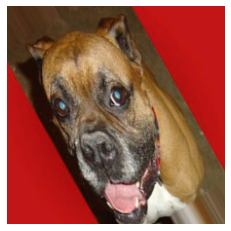

In [169]:
plt.imshow(x_train[3000])
plt.axis('off')
print(y_train[3000])

## one hot encode Label to train and test Data

In [137]:
y_train = my_model.one_hot_encode_2_labels(y_train,3)
y_test =my_model.one_hot_encode_2_labels(y_test,3)

Shape Of y Before Is  (4475,)
Shape Of y After Is  (4475, 3)
Shape Of y Before Is  (101,)
Shape Of y After Is  (101, 3)


In [115]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4475, 224, 224, 3)
(4475, 3)
(101, 224, 224, 3)
(101, 3)


# Load my model I train it before

In [165]:
m = my_model.load_my_model(model_path)

In [119]:
my_model.fit_the_model(m,x_train,y_train) # fit it my model

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


140/140 [==============================] - 2304s 16s/step - loss: 0.2444 - accuracy: 0.9911


In [146]:
y_hat =my_model.evaluate_model(x_test,y_test,m) # evaluate my model

4/4 [==============================] - 56s 12s/step - loss: 1.2136 - accuracy: 0.9802
[1.2136108875274658, 0.9801980257034302]
*******************
now predict y hat
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.98      0.98      0.98        50

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101

[[50  1]
 [ 1 49]]


# Test and Predict New Data 

this is cat
[[1. 0. 0.]]


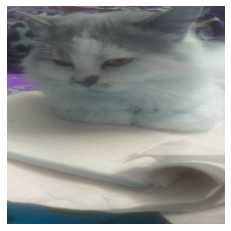

In [140]:
my_model.predict_one_image(image1_path,m,image_size) 

this is cat
[[1. 0. 0.]]


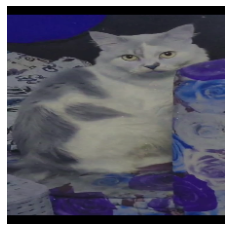

In [142]:
my_model.predict_one_image(image2_path,m,image_size)


this is dog
[[0. 1. 0.]]


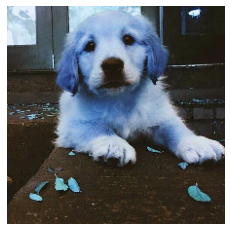

In [144]:
my_model.predict_one_image(dog_path,m,image_size)

# My Model Summary

In [166]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2